In [1]:
import sys
sys.path.append('../../src/utils/')

from galenv import *

from astroquery.irsa import Irsa
Irsa.ROW_LIMIT = 10000

%matplotlib inline

In [2]:
def plot_cone(coord, theta, res, xSize=7.5, ySize=7.5, title='', show=True, savefig=False, imgname="plot.png"):
        '''Only cone
        coord = astropy coordinates
        theta = Cone angle
        res = result catalog
        '''
        ra = coord.ra.value
        dec = coord.dec.value

        fig = plt.figure(figsize=(xSize, ySize))        
        gs = gridspec.GridSpec(1, 1)
        
        ax = plt.subplot(gs[0])
        # ax.axis('equal')
        limangle = 1.5*theta
        ax.set_xlim((ra-limangle, ra+limangle))
        ax.set_ylim((dec-limangle, dec+limangle))
        
        # Central position/object
        ax.plot(ra, dec, 'ro', alpha=0.5)
        
        # Catalog object
        ax.plot(res['ra'], res['dec'], 'k.')
        
        plt.gca().invert_xaxis() # RA from E to W
        ax.set_xlabel('RA (deg)')
        ax.set_ylabel('DEC (deg)')
        plt.title(title)

        # Circle
        # it is wrong if I draw a circle around (ra, dec) with radius theta
        # due to small circle in celestial sphere for DEC
        circle = plt.Circle((ra, dec), theta, fc='none', ec='black')
        ax.add_artist(circle)
        
        fig.tight_layout()

        if savefig:
            plt.savefig(imgname)

        if show:
            plt.show()

        plt.close()
        


In [3]:
ga = Galenv()

## Check using name

In [4]:
def search_and_plot(objname, tangential_dist, cat='fp_psc'):
    try:
        print(objname)
        z, v0, _ra, _dec = ga.queryobject_byname(objname)
        print("NED (z, v, ra, dec): ", z, v0, _ra, _dec)

        obj_coord = coordinates.SkyCoord(ra=_ra, dec=_dec, unit=(u.deg, u.deg))

        dA, theta = ga.calc_dA_theta(z, tangential_dist)
        print("From redshift & tangential_dist (dA, theta):", dA, theta)
        
        result = Irsa.query_region(obj_coord, catalog=cat, spatial="Cone", radius= theta * u.deg)
        
        plot_cone(obj_coord, theta, result, savefig=True, imgname=objname + '.png')
        
        return result, z, _ra, _dec
        print("----")
        
    except:
        print("error! maybe can not identify from name") 
        print("----")

In [5]:
def check_overdensity(data, ra_center, dec_center, z, rmin, rmax):
    dAmin, thetamin = ga.calc_dA_theta(z, rmin)
    dAmax, thetamax = ga.calc_dA_theta(z, rmax)
    
    inside = []
    outside = []
    
    for idata in data:
        ra_obj = idata['ra']
        dec_obj = idata['dec']
        obj =  coordinates.SkyCoord(ra=ra_obj, dec=dec_obj, unit=(u.deg, u.deg))
        center = coordinates.SkyCoord(ra=ra_center, dec=dec_center, unit=(u.deg, u.deg))

        dist = center.separation(obj)
        dist = dist.value
        if dist < thetamin:
            inside.append(idata)
        if dist > thetamin and dist < thetamax:
            outside.append(idata)
    
    number_inside = len(inside)
    number_outside = len(outside)
    area_inside = np.pi * thetamin**2
    area_outside = np.pi * (thetamax**2 - thetamin**2)

    density_inside = number_inside/area_inside
    density_outside = number_outside/area_outside
    
    comparison = density_inside/density_outside
    
    return inside, outside, thetamin, thetamax, [number_inside, number_outside, area_inside, area_outside, density_inside, density_outside, comparison]

WISE J161021.87-395858.4
NED (z, v, ra, dec):  0.518 155293.0 242.59116 -39.98287
From redshift & tangential_dist (dA, theta): 1321.2981017765974 0.08672649939637889


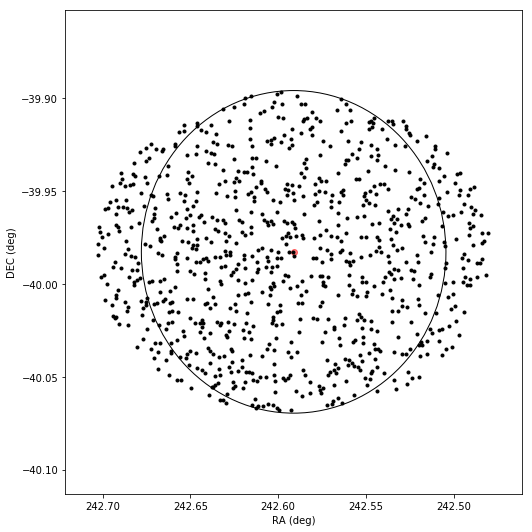

Overdensity:  1.1965317919075142
-----
[HB89] 1741-038
NED (z, v, ra, dec):  1.054 315981.0 265.99523 -3.83462
From redshift & tangential_dist (dA, theta): 1717.70727627639 0.06671192502285594


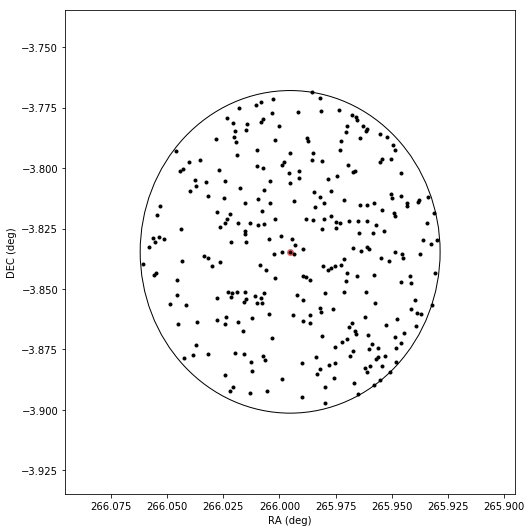

Overdensity:  0.8333333333333334
-----
3C 454.3
NED (z, v, ra, dec):  0.859 257522.0 343.49062 16.14821
From redshift & tangential_dist (dA, theta): 1629.9307676687627 0.07030455605796143


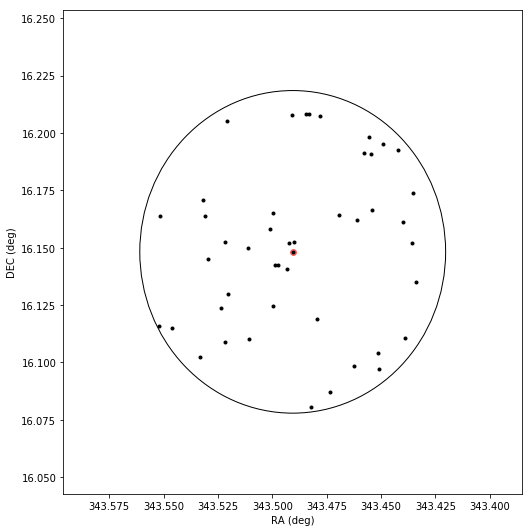

Overdensity:  2.6250000000000004
-----
PKS 0539-057
NED (z, v, ra, dec):  0.839 251526.0 85.40868 -5.69706
From redshift & tangential_dist (dA, theta): 1618.0605034352159 0.07082031777111027


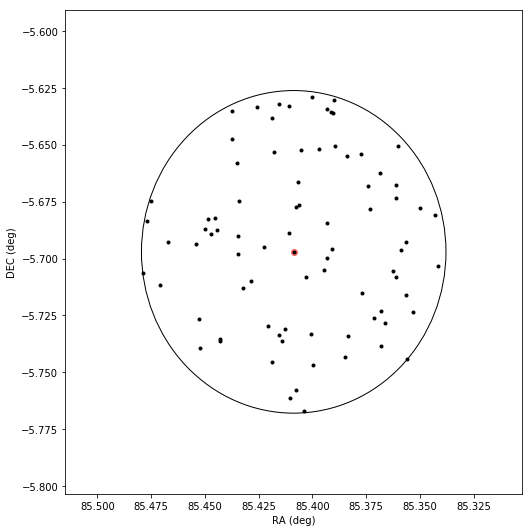

Overdensity:  1.5
-----
PKS 0601-70
NED (z, v, ra, dec):  2.409 722200.0 90.29717 -70.60239
From redshift & tangential_dist (dA, theta): 1719.5229114516012 0.06664148425299422


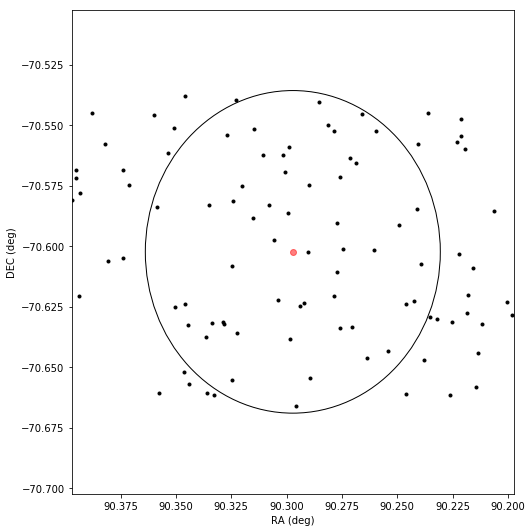

Overdensity:  0.931034482758621
-----
SSTSL2 J113006.83-144912.6
NED (z, v, ra, dec):  0.95 284803.0 172.52828 -14.82011
From redshift & tangential_dist (dA, theta): 1676.7426585476921 0.06834176875145405


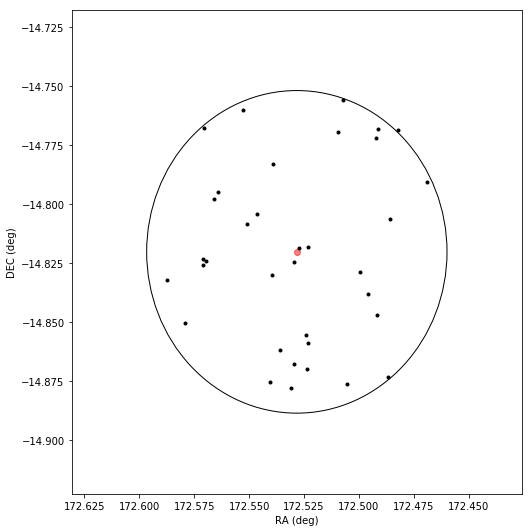

Overdensity:  4.0
-----
NGC 4945
NED (z, v, ra, dec):  0.001878 563.0 196.36449 -49.46821
From redshift & tangential_dist (dA, theta): 8.292149410020395 13.819282957889058
error! maybe can not identify from name
----
Error

[HB89] 0333+321 ABS01
NED (z, v, ra, dec):  0.9532 285762.0 54.12516 32.30815
From redshift & tangential_dist (dA, theta): 1678.189933316063 0.06828283065656011


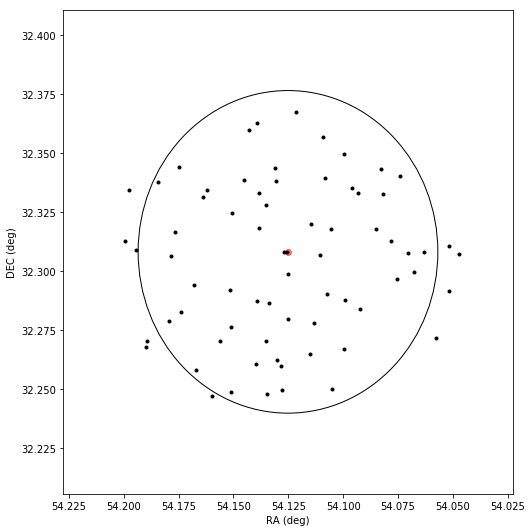

Overdensity:  1.5
-----
PKS 0003-066
NED (z, v, ra, dec):  0.346676 103931.0 1.55789 -6.39315
From redshift & tangential_dist (dA, theta): 1044.0300496957655 0.10975887050335101


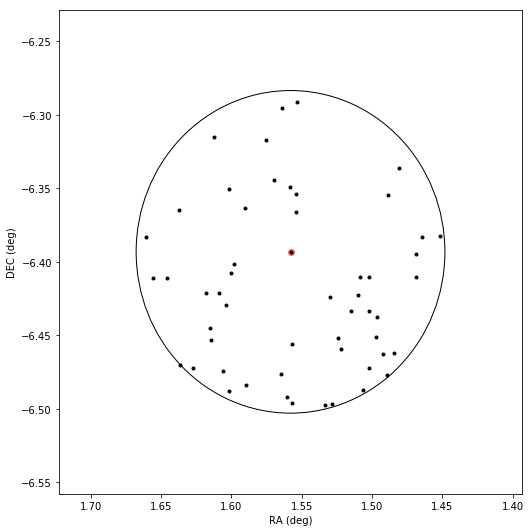

Overdensity:  0.3333333333333333
-----
PKS 1830-21
NED (z, v, ra, dec):  2.507 751580.0 278.4162 -21.06105
From redshift & tangential_dist (dA, theta): 1705.1650629156973 0.06720261956940529


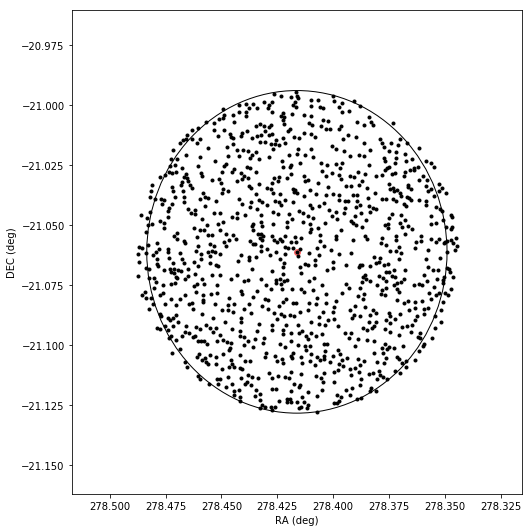

Overdensity:  1.1602209944751383
-----
[HB89] 0234+285
NED (z, v, ra, dec):  1.213 363648.0 39.46836 28.8025
From redshift & tangential_dist (dA, theta): 1759.843219104895 0.06511464077149388


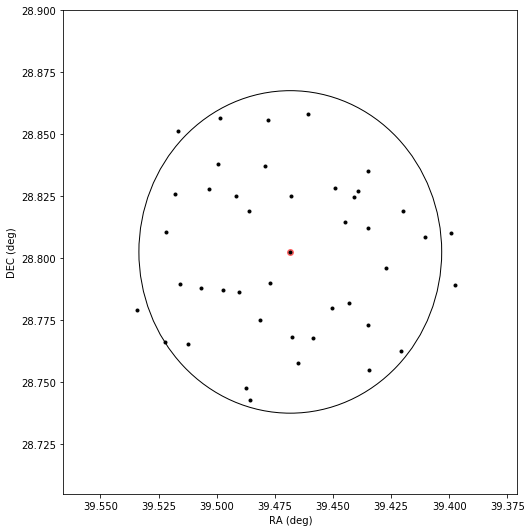

Overdensity:  0.5454545454545455
-----
[HB89] 0748+126
NED (z, v, ra, dec):  0.889 266516.0 117.71686 12.51801
From redshift & tangential_dist (dA, theta): 1646.623423400248 0.06959184316079697


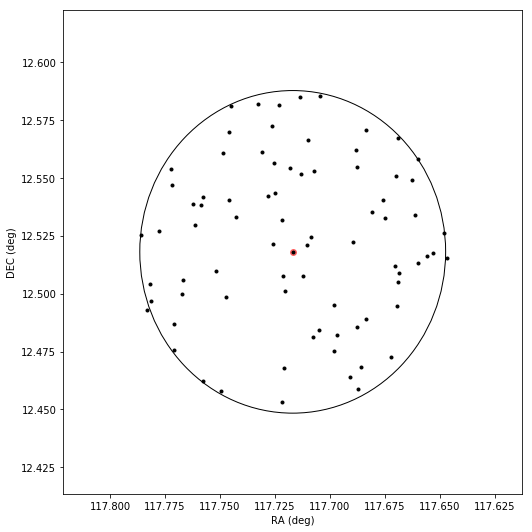

Overdensity:  4.0
-----
[HB89] 1749+096
NED (z, v, ra, dec):  0.322 96533.0 267.88674 9.6502
From redshift & tangential_dist (dA, theta): 994.3201278022433 0.11524614238620276


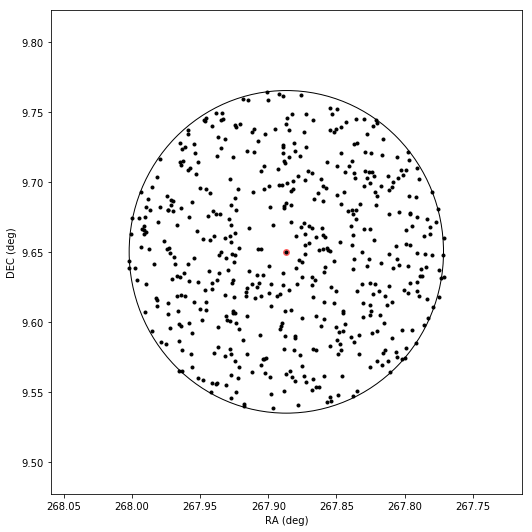

Overdensity:  0.8653846153846154
-----
WISE J094857.31+002225.6
NED (z, v, ra, dec):  0.585102 175409.0 147.23883 0.37377
From redshift & tangential_dist (dA, theta): 1403.290777152521 0.08165916921273253


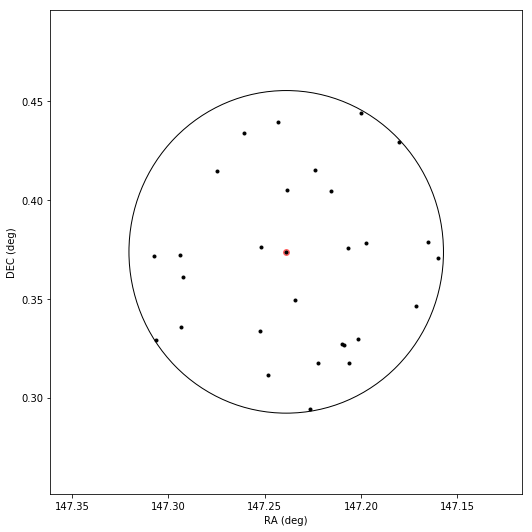

Overdensity:  1.4999999999999998
-----
[HB89] 1104-445
NED (z, v, ra, dec):  1.598 479068.0 166.78622 -44.81877
From redshift & tangential_dist (dA, theta): 1793.3027653878596 0.06389972805366222


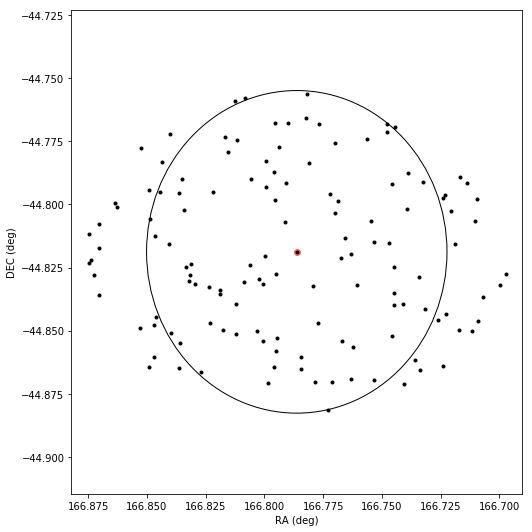

Overdensity:  1.4210526315789476
-----
3C 279
NED (z, v, ra, dec):  0.5362 160749.0 194.04653 -5.78931
From redshift & tangential_dist (dA, theta): 1344.817110605312 0.08520977173958334


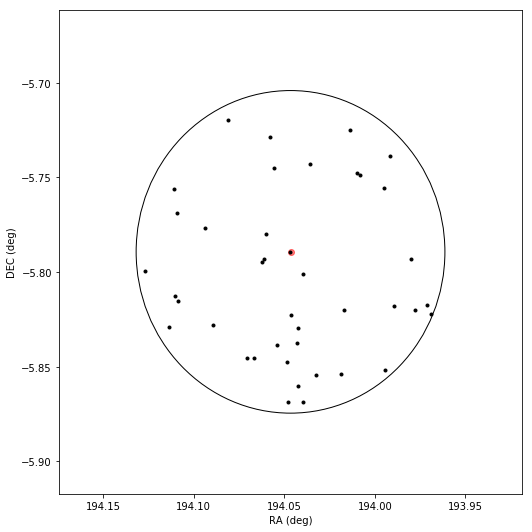

Overdensity:  5.0
-----
WISE J183005.92+061915.7
NED (z, v, ra, dec):  0.745 223345.0 277.52475 6.3211
From redshift & tangential_dist (dA, theta): 1553.4923551806653 0.07376383838904574


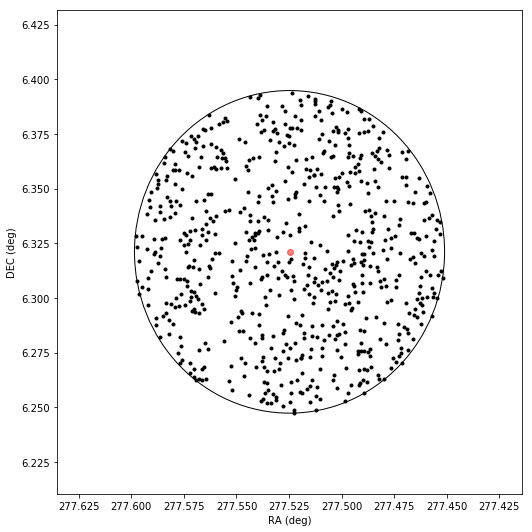

Overdensity:  1.2782608695652176
-----
MESSIER 084
NED (z, v, ra, dec):  0.003392 1017.0 186.2656 12.88698
From redshift & tangential_dist (dA, theta): 14.949233862918131 7.665380050706896
error! maybe can not identify from name
----
Error

[HB89] 1514+197
NED (z, v, ra, dec):  1.07 320778.0 229.23665 19.53694
From redshift & tangential_dist (dA, theta): 1722.9801220862478 0.06650776614149963


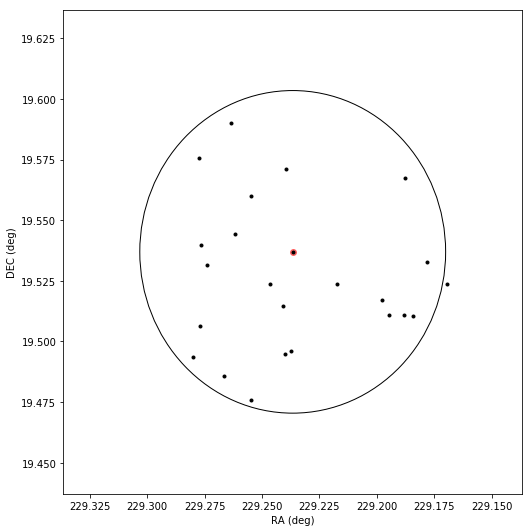

Overdensity:  1.4999999999999998
-----
LQAC 069+030 001
NED (z, v, ra, dec):  1.454 435898.0 69.52062 30.07931
From redshift & tangential_dist (dA, theta): 1789.4637633558145 0.06403681447634847


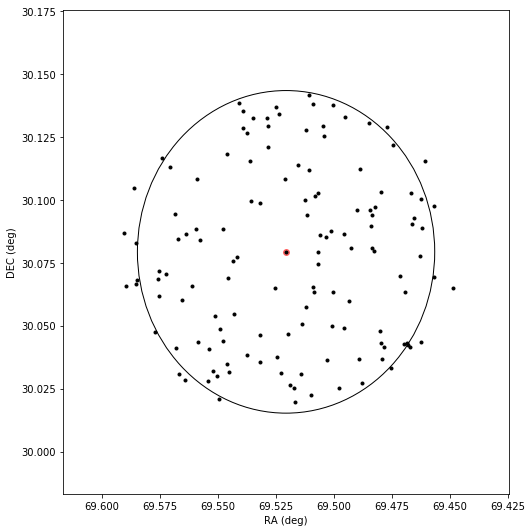

Overdensity:  0.625
-----
[HB89] 2131-021
NED (z, v, ra, dec):  1.285 385233.0 323.54296 -1.88812
From redshift & tangential_dist (dA, theta): 1772.3854802599205 0.06465385792336766


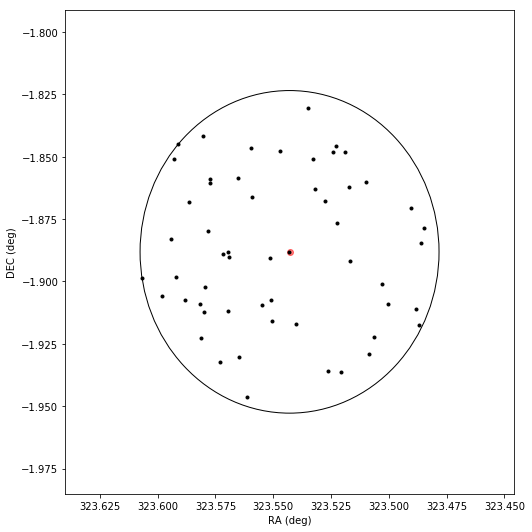

Overdensity:  0.5000000000000001
-----
4C +00.81
NED (z, v, ra, dec):  2.249877 674496.0 336.6939 0.86981
From redshift & tangential_dist (dA, theta): 1741.4070377375724 0.06580400592330295


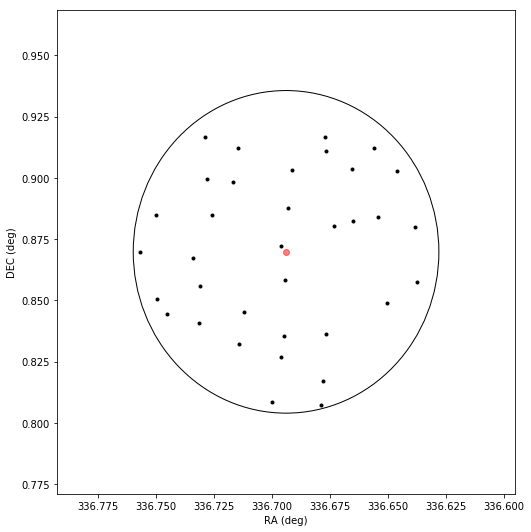

Overdensity:  1.5
-----
LQAC 066+023 001
NED (z, v, ra, dec):  0.55 164886.0 66.73223 23.46101
From redshift & tangential_dist (dA, theta): 1361.9988946301735 0.08413483996055661


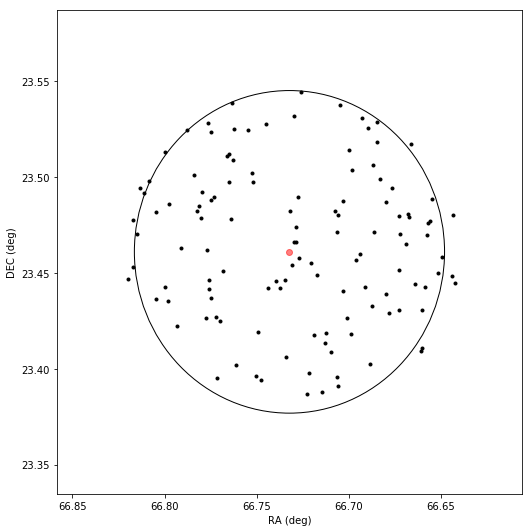

Overdensity:  2.0000000000000004
-----
PKS 1622-29
NED (z, v, ra, dec):  0.815 244331.0 246.52509 -29.85749
From redshift & tangential_dist (dA, theta): 1602.9924999664522 0.07148602319010404


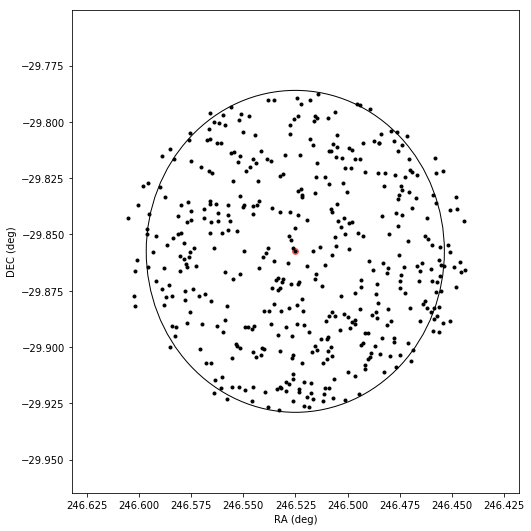

Overdensity:  1.3098591549295775
-----
PKS 1057-79
NED (z, v, ra, dec):  0.581 174179.0 164.68046 -80.06504
From redshift & tangential_dist (dA, theta): 1398.6384248097584 0.08193079568920845


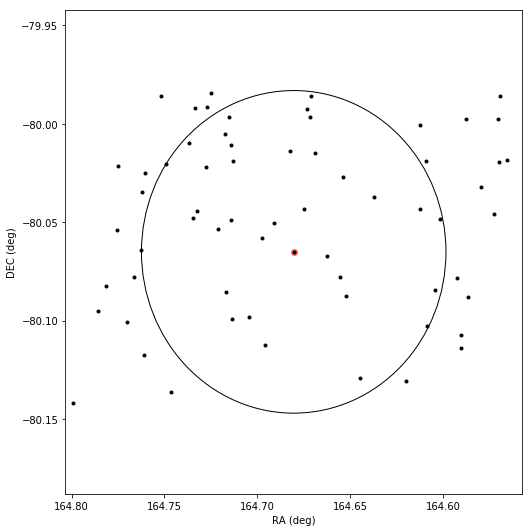

Overdensity:  0.8181818181818181
-----


In [6]:
objlist = ['WISE J161021.87-395858.4', 
           '[HB89] 1741-038', 
           '3C 454.3', 
           'PKS 0539-057', 
           'PKS 0601-70', 
           'SSTSL2 J113006.83-144912.6',
           'NGC 4945', 
           '[HB89] 0333+321 ABS01', 
           'PKS 0003-066', 
           'PKS 1830-21', 
           '[HB89] 0234+285', 
           '[HB89] 0748+126',
           '[HB89] 1749+096', 
           'WISE J094857.31+002225.6', 
           '[HB89] 1104-445', 
           '3C 279', 
           'WISE J183005.92+061915.7', 
           'MESSIER 084', 
           '[HB89] 1514+197', 
           'LQAC 069+030 001', 
           '[HB89] 2131-021', 
           '4C +00.81', 
           'LQAC 066+023 001',
           'PKS 1622-29', 
           'PKS 1057-79']

res = []
for objname in objlist:
    try:
        data, z, ra_center, dec_center = search_and_plot(objname, 2.0, 'fp_psc')
        if len(data) >= Irsa.ROW_LIMIT: print("Probably number of rows limit < number of data")
        inside, outside, thetamin, thetamax, result_par = check_overdensity(data, ra_center, dec_center, z, 0.5, 1.0)
        print("Overdensity: ", result_par[-1])
        res.append([objname, data, z, ra_center, dec_center, inside, outside, thetamin, thetamax, result_par])
        print("-----")
    
    except:
        print("Error\n")

In [7]:
number_of_overdensity = 0
number_of_lowdensity = 0 
for ires in res:
    od = ires[-1][-1]
    print(od)
    if od > 1.0:
        number_of_overdensity += 1
    else:
        number_of_lowdensity +=1
print("Low:", number_of_lowdensity, "    High:", number_of_overdensity)

1.1965317919075142
0.8333333333333334
2.6250000000000004
1.5
0.931034482758621
4.0
1.5
0.3333333333333333
1.1602209944751383
0.5454545454545455
4.0
0.8653846153846154
1.4999999999999998
1.4210526315789476
5.0
1.2782608695652176
1.4999999999999998
0.625
0.5000000000000001
1.5
2.0000000000000004
1.3098591549295775
0.8181818181818181
Low: 8     High: 15


WISE J161021.87-395858.4
NED (z, v, ra, dec):  0.518 155293.0 242.59116 -39.98287
From redshift & tangential_dist (dA, theta): 1321.2981017765974 0.08672649939637889


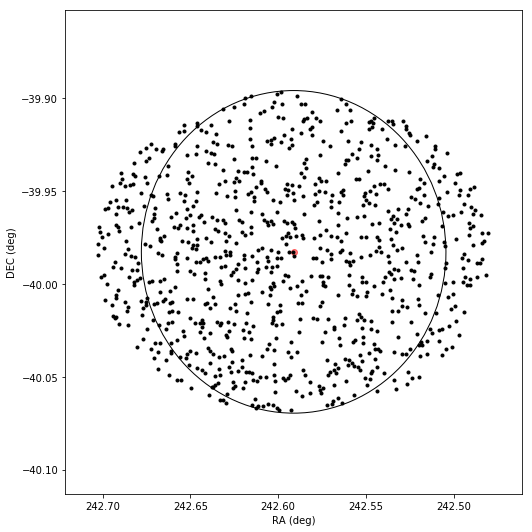

Overdensity:  1.11864406779661
-----
[HB89] 1741-038
NED (z, v, ra, dec):  1.054 315981.0 265.99523 -3.83462
From redshift & tangential_dist (dA, theta): 1717.70727627639 0.06671192502285594


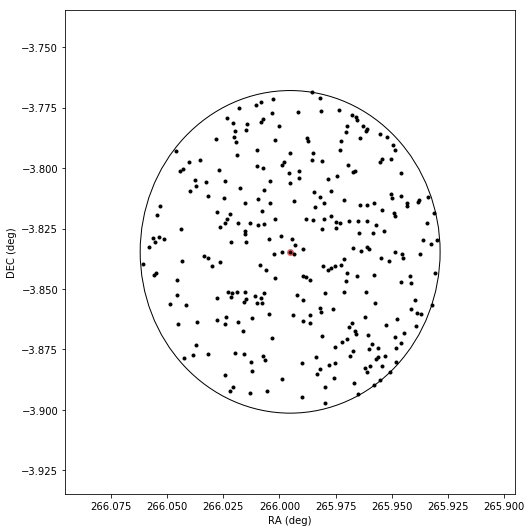

Overdensity:  1.3398058252427185
-----
3C 454.3
NED (z, v, ra, dec):  0.859 257522.0 343.49062 16.14821
From redshift & tangential_dist (dA, theta): 1629.9307676687627 0.07030455605796143


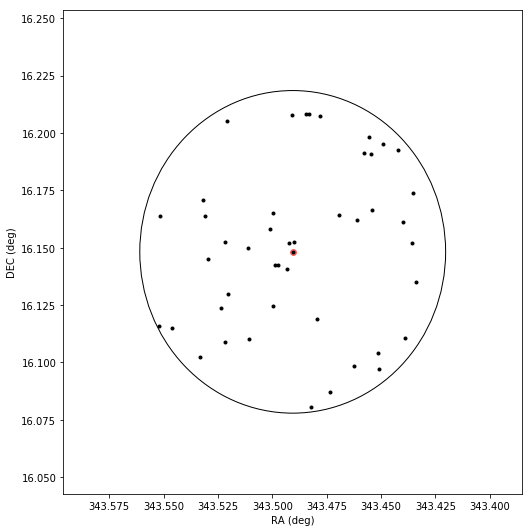

Overdensity:  1.4516129032258067
-----
PKS 0539-057
NED (z, v, ra, dec):  0.839 251526.0 85.40868 -5.69706
From redshift & tangential_dist (dA, theta): 1618.0605034352159 0.07082031777111027


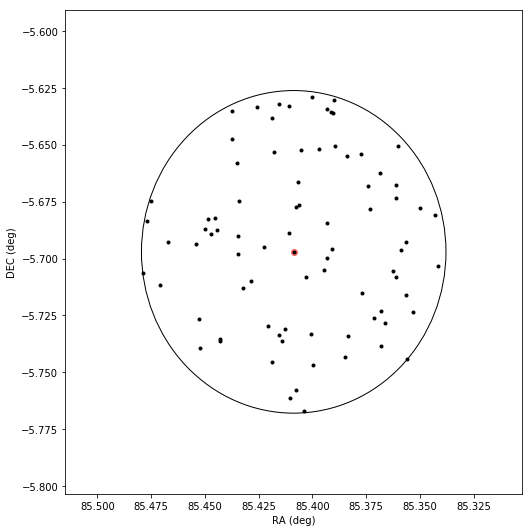

Overdensity:  0.84375
-----
PKS 0601-70
NED (z, v, ra, dec):  2.409 722200.0 90.29717 -70.60239
From redshift & tangential_dist (dA, theta): 1719.5229114516012 0.06664148425299422


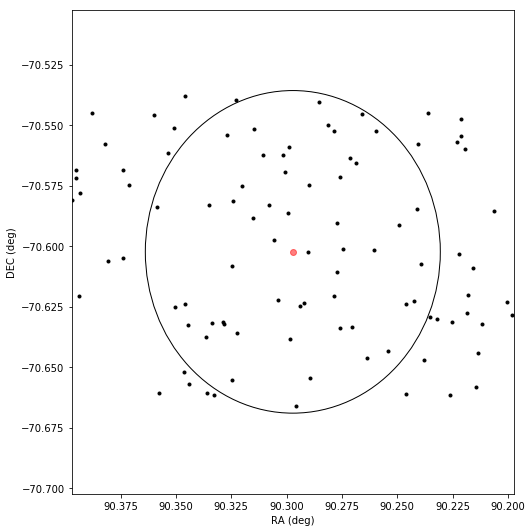

Overdensity:  0.9913043478260871
-----
SSTSL2 J113006.83-144912.6
NED (z, v, ra, dec):  0.95 284803.0 172.52828 -14.82011
From redshift & tangential_dist (dA, theta): 1676.7426585476921 0.06834176875145405


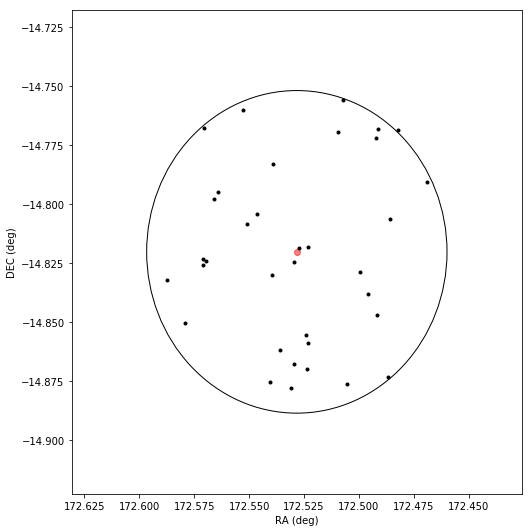

Overdensity:  0.7499999999999999
-----
NGC 4945
NED (z, v, ra, dec):  0.001878 563.0 196.36449 -49.46821
From redshift & tangential_dist (dA, theta): 8.292149410020395 13.819282957889058
error! maybe can not identify from name
----
Error

[HB89] 0333+321 ABS01
NED (z, v, ra, dec):  0.9532 285762.0 54.12516 32.30815
From redshift & tangential_dist (dA, theta): 1678.189933316063 0.06828283065656011


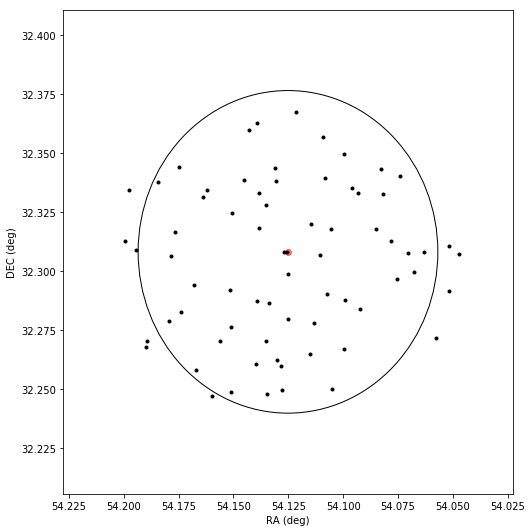

Overdensity:  1.0384615384615385
-----
PKS 0003-066
NED (z, v, ra, dec):  0.346676 103931.0 1.55789 -6.39315
From redshift & tangential_dist (dA, theta): 1044.0300496957655 0.10975887050335101


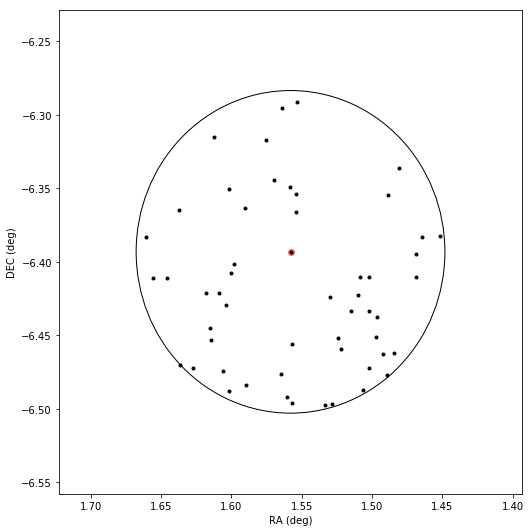

Overdensity:  0.6818181818181818
-----
PKS 1830-21
NED (z, v, ra, dec):  2.507 751580.0 278.4162 -21.06105
From redshift & tangential_dist (dA, theta): 1705.1650629156973 0.06720261956940529


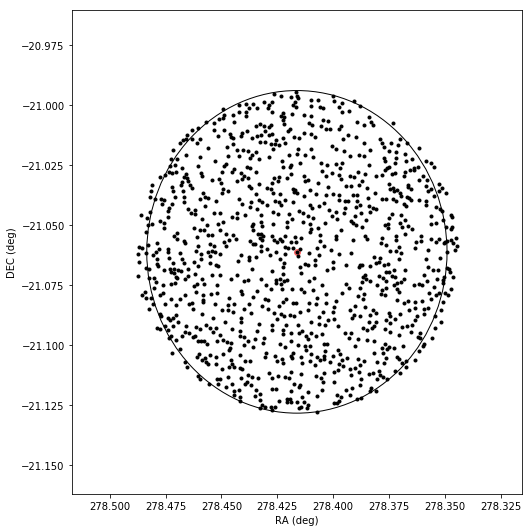

Overdensity:  0.9083232810615199
-----
[HB89] 0234+285
NED (z, v, ra, dec):  1.213 363648.0 39.46836 28.8025
From redshift & tangential_dist (dA, theta): 1759.843219104895 0.06511464077149388


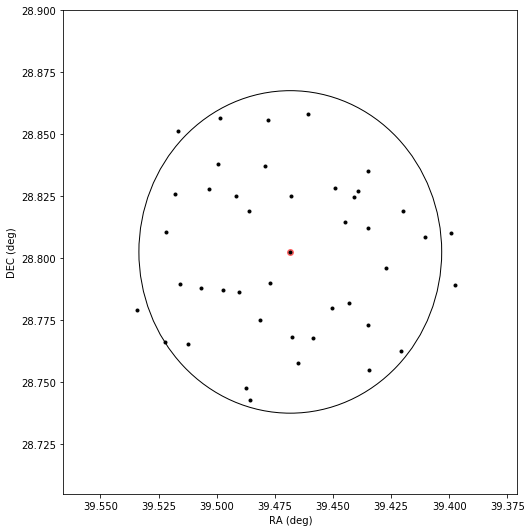

Overdensity:  1.3
-----
[HB89] 0748+126
NED (z, v, ra, dec):  0.889 266516.0 117.71686 12.51801
From redshift & tangential_dist (dA, theta): 1646.623423400248 0.06959184316079697


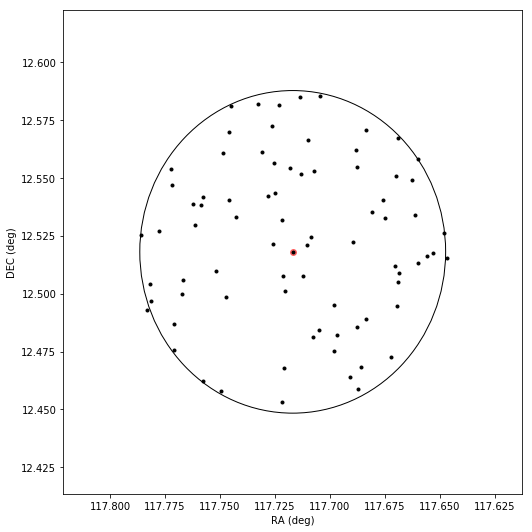

Overdensity:  0.6461538461538462
-----
[HB89] 1749+096
NED (z, v, ra, dec):  0.322 96533.0 267.88674 9.6502
From redshift & tangential_dist (dA, theta): 994.3201278022433 0.11524614238620276


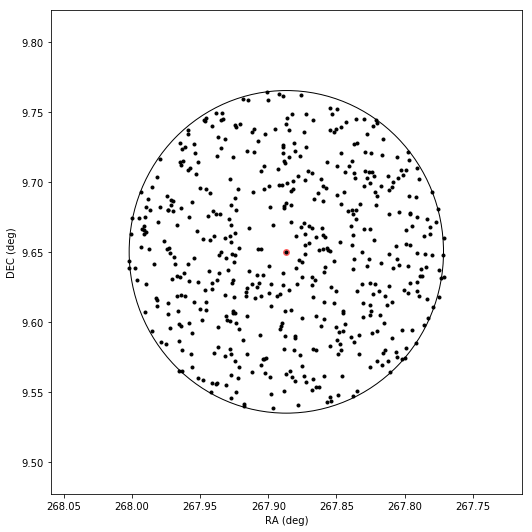

Overdensity:  1.0441558441558443
-----
WISE J094857.31+002225.6
NED (z, v, ra, dec):  0.585102 175409.0 147.23883 0.37377
From redshift & tangential_dist (dA, theta): 1403.290777152521 0.08165916921273253


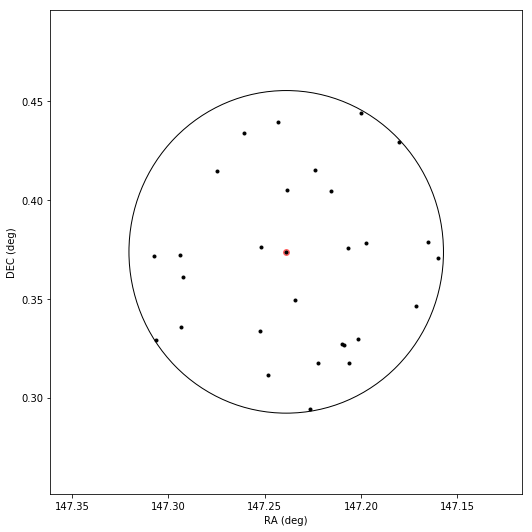

Overdensity:  0.7826086956521737
-----
[HB89] 1104-445
NED (z, v, ra, dec):  1.598 479068.0 166.78622 -44.81877
From redshift & tangential_dist (dA, theta): 1793.3027653878596 0.06389972805366222


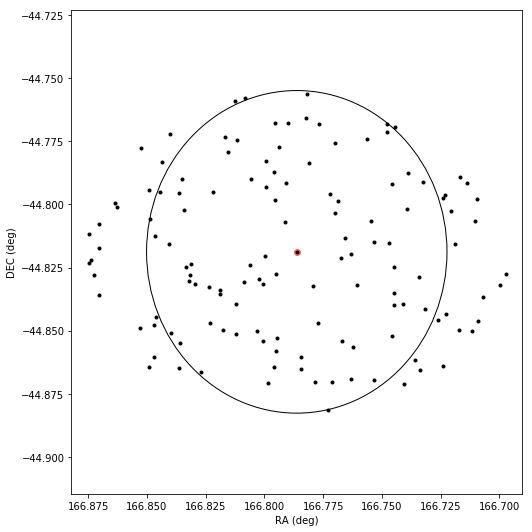

Overdensity:  0.8155339805825244
-----
3C 279
NED (z, v, ra, dec):  0.5362 160749.0 194.04653 -5.78931
From redshift & tangential_dist (dA, theta): 1344.817110605312 0.08520977173958334


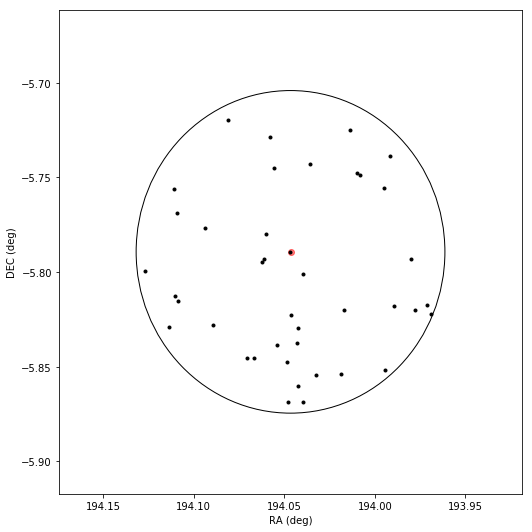

Overdensity:  0.7272727272727273
-----
WISE J183005.92+061915.7
NED (z, v, ra, dec):  0.745 223345.0 277.52475 6.3211
From redshift & tangential_dist (dA, theta): 1553.4923551806653 0.07376383838904574


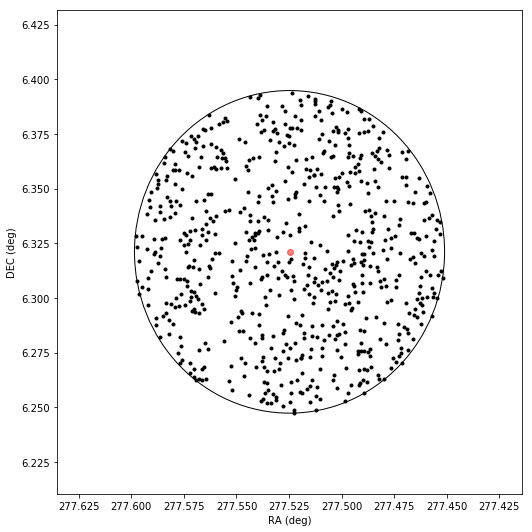

Overdensity:  0.9230769230769234
-----
MESSIER 084
NED (z, v, ra, dec):  0.003392 1017.0 186.2656 12.88698
From redshift & tangential_dist (dA, theta): 14.949233862918131 7.665380050706896
error! maybe can not identify from name
----
Error

[HB89] 1514+197
NED (z, v, ra, dec):  1.07 320778.0 229.23665 19.53694
From redshift & tangential_dist (dA, theta): 1722.9801220862478 0.06650776614149963


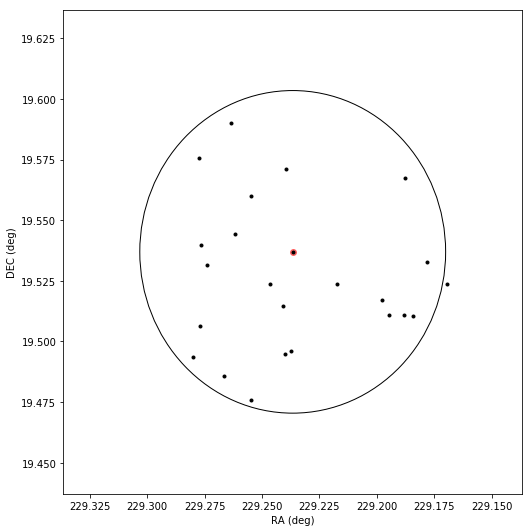

Overdensity:  0.9999999999999999
-----
LQAC 069+030 001
NED (z, v, ra, dec):  1.454 435898.0 69.52062 30.07931
From redshift & tangential_dist (dA, theta): 1789.4637633558145 0.06403681447634847


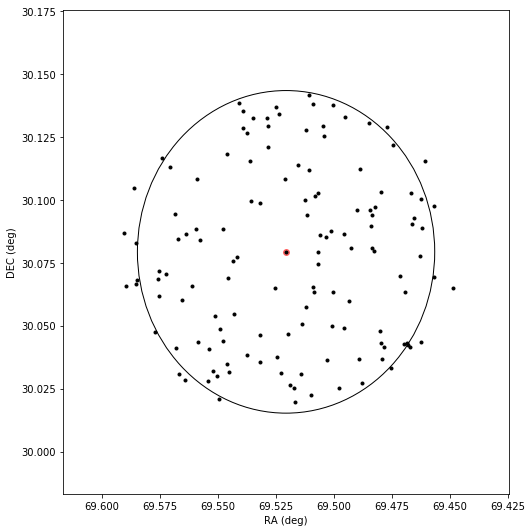

Overdensity:  0.8285714285714285
-----
[HB89] 2131-021
NED (z, v, ra, dec):  1.285 385233.0 323.54296 -1.88812
From redshift & tangential_dist (dA, theta): 1772.3854802599205 0.06465385792336766


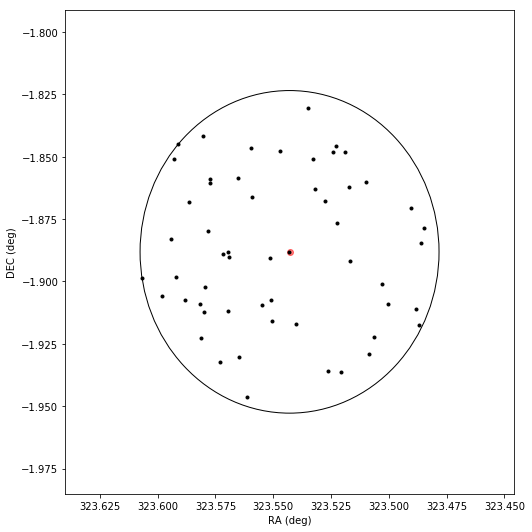

Overdensity:  1.0243902439024393
-----
4C +00.81
NED (z, v, ra, dec):  2.249877 674496.0 336.6939 0.86981
From redshift & tangential_dist (dA, theta): 1741.4070377375724 0.06580400592330295


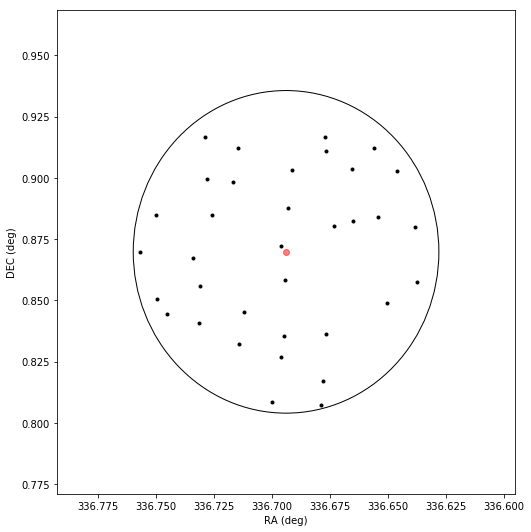

Overdensity:  0.6206896551724139
-----
LQAC 066+023 001
NED (z, v, ra, dec):  0.55 164886.0 66.73223 23.46101
From redshift & tangential_dist (dA, theta): 1361.9988946301735 0.08413483996055661


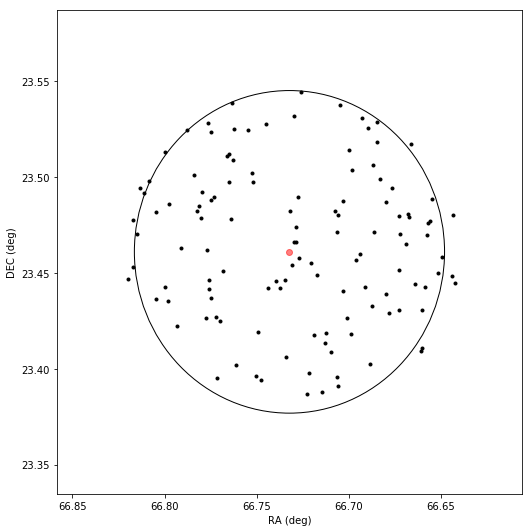

Overdensity:  0.7731958762886598
-----
PKS 1622-29
NED (z, v, ra, dec):  0.815 244331.0 246.52509 -29.85749
From redshift & tangential_dist (dA, theta): 1602.9924999664522 0.07148602319010404


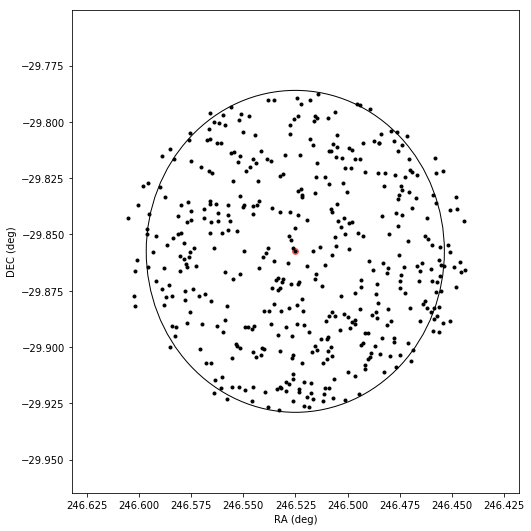

Overdensity:  0.8869565217391304
-----
PKS 1057-79
NED (z, v, ra, dec):  0.581 174179.0 164.68046 -80.06504
From redshift & tangential_dist (dA, theta): 1398.6384248097584 0.08193079568920845


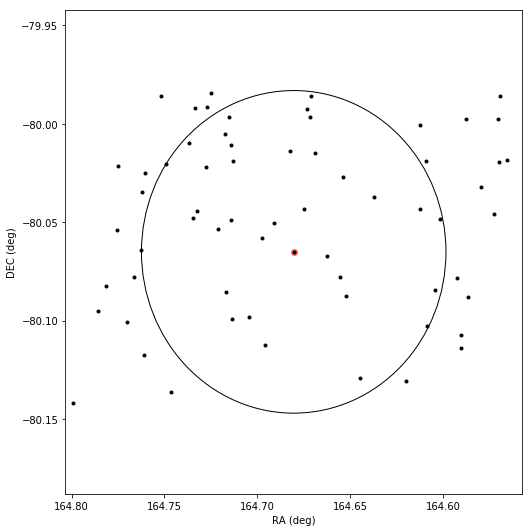

Overdensity:  1.0838709677419356
-----


In [8]:
objlist = ['WISE J161021.87-395858.4', 
           '[HB89] 1741-038', 
           '3C 454.3', 
           'PKS 0539-057', 
           'PKS 0601-70', 
           'SSTSL2 J113006.83-144912.6',
           'NGC 4945', 
           '[HB89] 0333+321 ABS01', 
           'PKS 0003-066', 
           'PKS 1830-21', 
           '[HB89] 0234+285', 
           '[HB89] 0748+126',
           '[HB89] 1749+096', 
           'WISE J094857.31+002225.6', 
           '[HB89] 1104-445', 
           '3C 279', 
           'WISE J183005.92+061915.7', 
           'MESSIER 084', 
           '[HB89] 1514+197', 
           'LQAC 069+030 001', 
           '[HB89] 2131-021', 
           '4C +00.81', 
           'LQAC 066+023 001',
           'PKS 1622-29', 
           'PKS 1057-79']

res = []
for objname in objlist:
    try:
        data, z, ra_center, dec_center = search_and_plot(objname, 2.0, 'fp_psc')
        if len(data) >= Irsa.ROW_LIMIT: print("Probably number of rows limit < number of data")
        inside, outside, thetamin, thetamax, result_par = check_overdensity(data, ra_center, dec_center, z, 1, 2.0)
        print("Overdensity: ", result_par[-1])
        res.append([objname, data, z, ra_center, dec_center, inside, outside, thetamin, thetamax, result_par])
        print("-----")
    
    except:
        print("Error\n")

In [9]:
number_of_overdensity = 0
number_of_lowdensity = 0 
for ires in res:
    od = ires[-1][-1]
    print(od)
    if od > 1.0:
        number_of_overdensity += 1
    else:
        number_of_lowdensity +=1

print("Low:", number_of_lowdensity, "    High:", number_of_overdensity)

1.11864406779661
1.3398058252427185
1.4516129032258067
0.84375
0.9913043478260871
0.7499999999999999
1.0384615384615385
0.6818181818181818
0.9083232810615199
1.3
0.6461538461538462
1.0441558441558443
0.7826086956521737
0.8155339805825244
0.7272727272727273
0.9230769230769234
0.9999999999999999
0.8285714285714285
1.0243902439024393
0.6206896551724139
0.7731958762886598
0.8869565217391304
1.0838709677419356
Low: 15     High: 8


WISE J161021.87-395858.4
NED (z, v, ra, dec):  0.518 155293.0 242.59116 -39.98287
From redshift & tangential_dist (dA, theta): 1321.2981017765974 0.08672649939637889


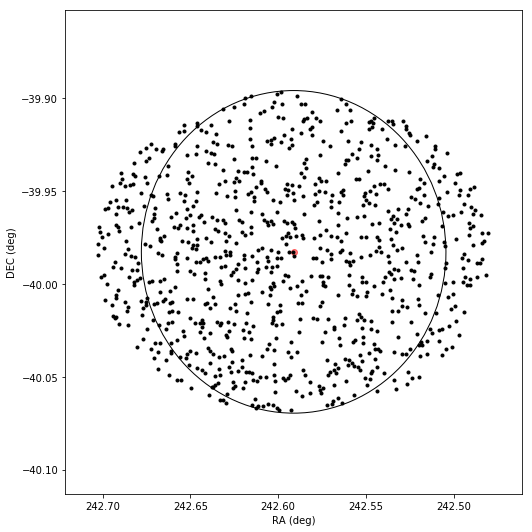

Overdensity:  1.2591240875912408
-----
[HB89] 1741-038
NED (z, v, ra, dec):  1.054 315981.0 265.99523 -3.83462
From redshift & tangential_dist (dA, theta): 1717.70727627639 0.06671192502285594


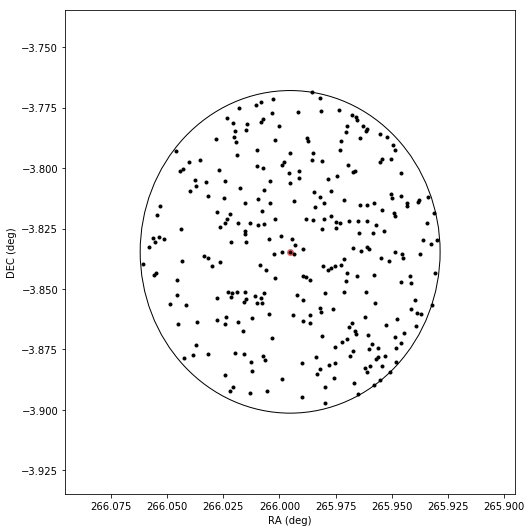

Overdensity:  1.079136690647482
-----
3C 454.3
NED (z, v, ra, dec):  0.859 257522.0 343.49062 16.14821
From redshift & tangential_dist (dA, theta): 1629.9307676687627 0.07030455605796143


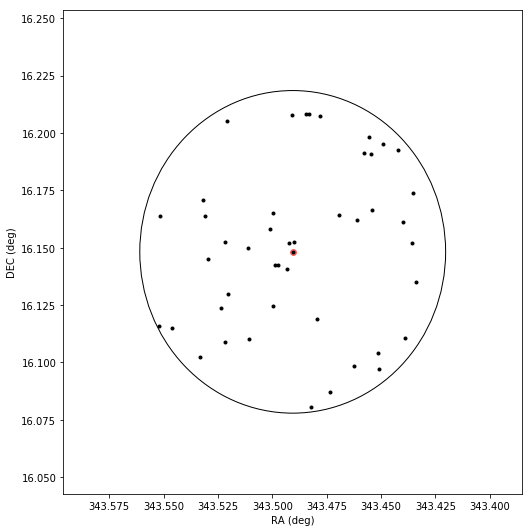

Overdensity:  2.6923076923076925
-----
PKS 0539-057
NED (z, v, ra, dec):  0.839 251526.0 85.40868 -5.69706
From redshift & tangential_dist (dA, theta): 1618.0605034352159 0.07082031777111027


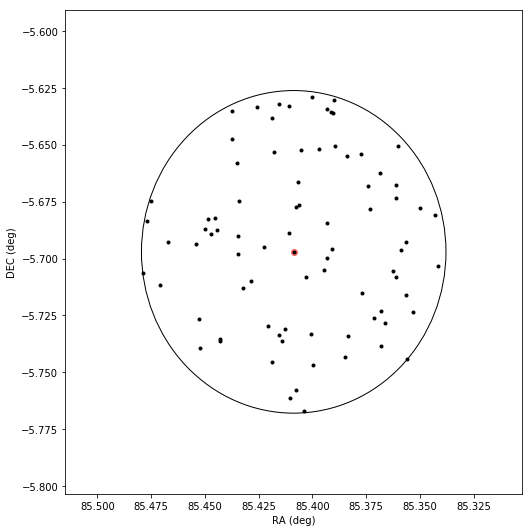

Overdensity:  1.1842105263157896
-----
PKS 0601-70
NED (z, v, ra, dec):  2.409 722200.0 90.29717 -70.60239
From redshift & tangential_dist (dA, theta): 1719.5229114516012 0.06664148425299422


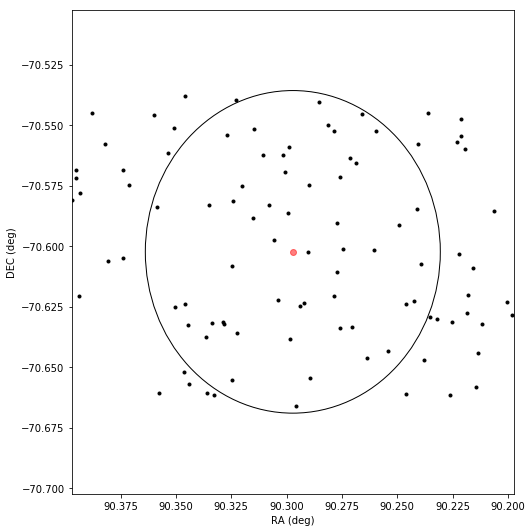

Overdensity:  0.9375
-----
SSTSL2 J113006.83-144912.6
NED (z, v, ra, dec):  0.95 284803.0 172.52828 -14.82011
From redshift & tangential_dist (dA, theta): 1676.7426585476921 0.06834176875145405


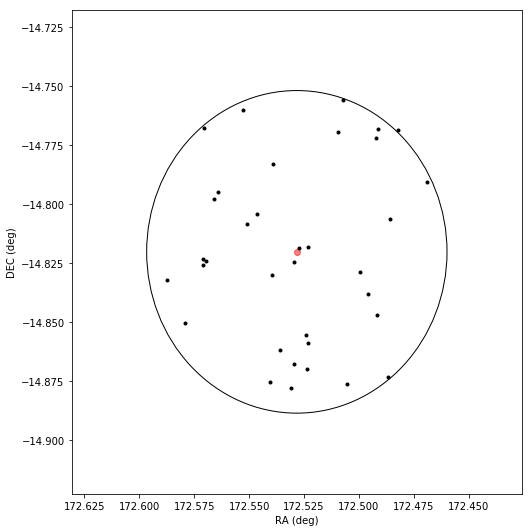

Overdensity:  1.9354838709677422
-----
NGC 4945
NED (z, v, ra, dec):  0.001878 563.0 196.36449 -49.46821
From redshift & tangential_dist (dA, theta): 8.292149410020395 13.819282957889058
error! maybe can not identify from name
----
Error

[HB89] 0333+321 ABS01
NED (z, v, ra, dec):  0.9532 285762.0 54.12516 32.30815
From redshift & tangential_dist (dA, theta): 1678.189933316063 0.06828283065656011


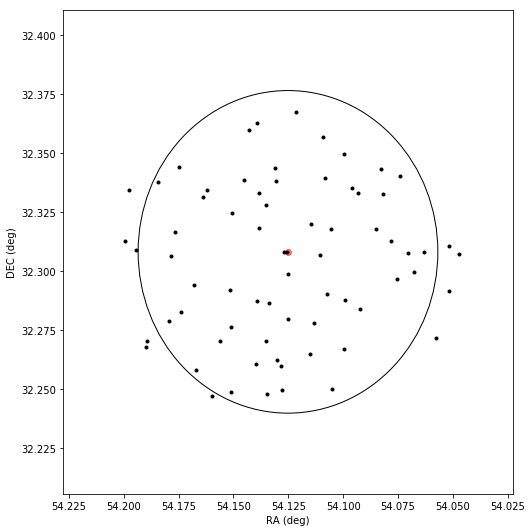

Overdensity:  1.4062500000000002
-----
PKS 0003-066
NED (z, v, ra, dec):  0.346676 103931.0 1.55789 -6.39315
From redshift & tangential_dist (dA, theta): 1044.0300496957655 0.10975887050335101


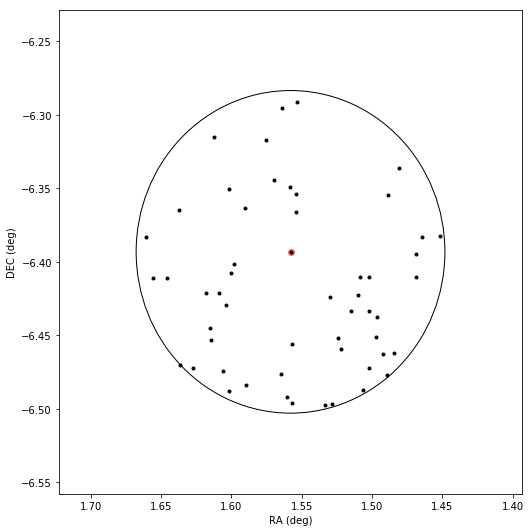

Overdensity:  0.28301886792452835
-----
PKS 1830-21
NED (z, v, ra, dec):  2.507 751580.0 278.4162 -21.06105
From redshift & tangential_dist (dA, theta): 1705.1650629156973 0.06720261956940529


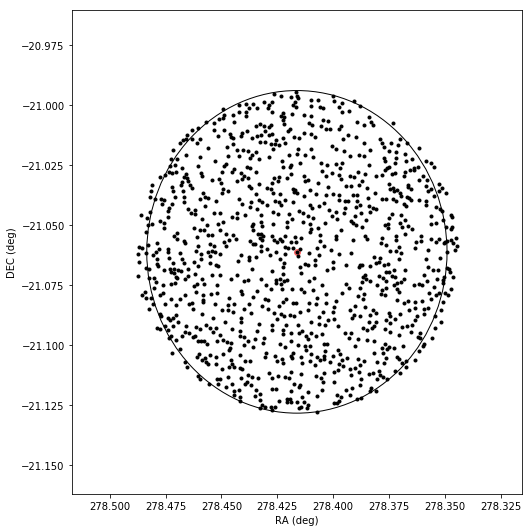

Overdensity:  1.0396039603960394
-----
[HB89] 0234+285
NED (z, v, ra, dec):  1.213 363648.0 39.46836 28.8025
From redshift & tangential_dist (dA, theta): 1759.843219104895 0.06511464077149388


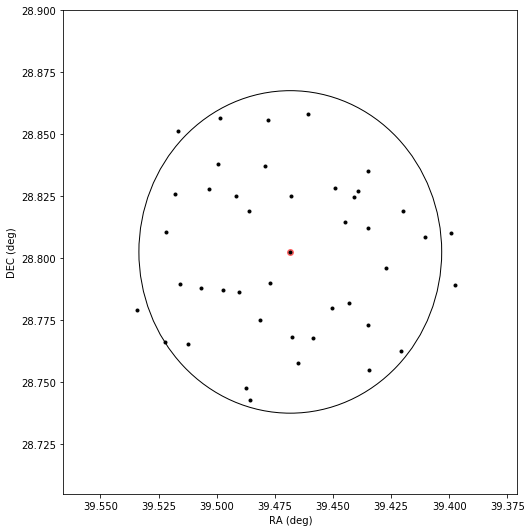

Overdensity:  0.7317073170731707
-----
[HB89] 0748+126
NED (z, v, ra, dec):  0.889 266516.0 117.71686 12.51801
From redshift & tangential_dist (dA, theta): 1646.623423400248 0.06959184316079697


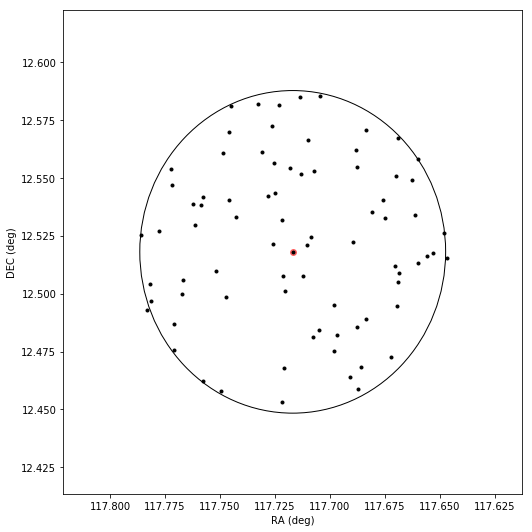

Overdensity:  1.6901408450704223
-----
[HB89] 1749+096
NED (z, v, ra, dec):  0.322 96533.0 267.88674 9.6502
From redshift & tangential_dist (dA, theta): 994.3201278022433 0.11524614238620276


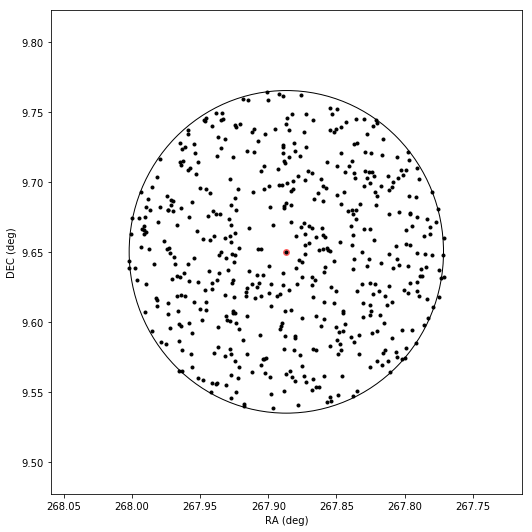

Overdensity:  0.920245398773006
-----
WISE J094857.31+002225.6
NED (z, v, ra, dec):  0.585102 175409.0 147.23883 0.37377
From redshift & tangential_dist (dA, theta): 1403.290777152521 0.08165916921273253


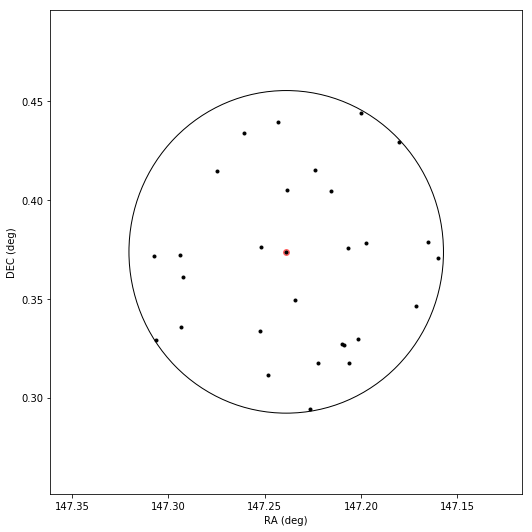

Overdensity:  1.111111111111111
-----
[HB89] 1104-445
NED (z, v, ra, dec):  1.598 479068.0 166.78622 -44.81877
From redshift & tangential_dist (dA, theta): 1793.3027653878596 0.06389972805366222


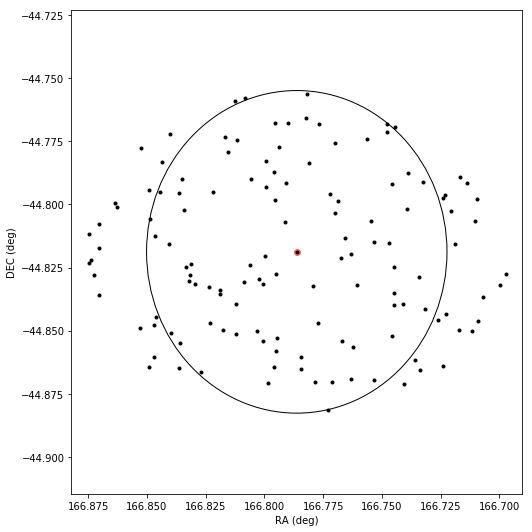

Overdensity:  1.1065573770491806
-----
3C 279
NED (z, v, ra, dec):  0.5362 160749.0 194.04653 -5.78931
From redshift & tangential_dist (dA, theta): 1344.817110605312 0.08520977173958334


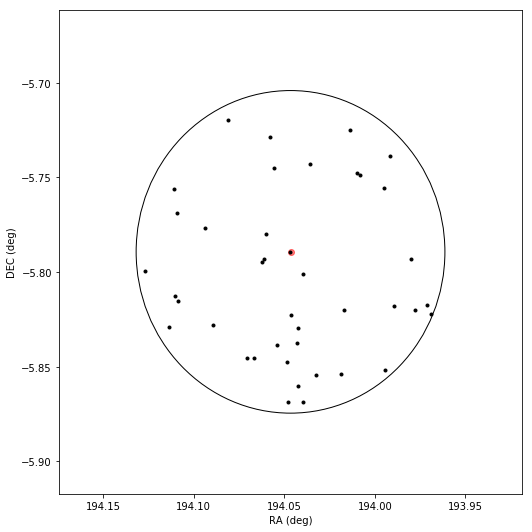

Overdensity:  2.083333333333333
-----
WISE J183005.92+061915.7
NED (z, v, ra, dec):  0.745 223345.0 277.52475 6.3211
From redshift & tangential_dist (dA, theta): 1553.4923551806653 0.07376383838904574


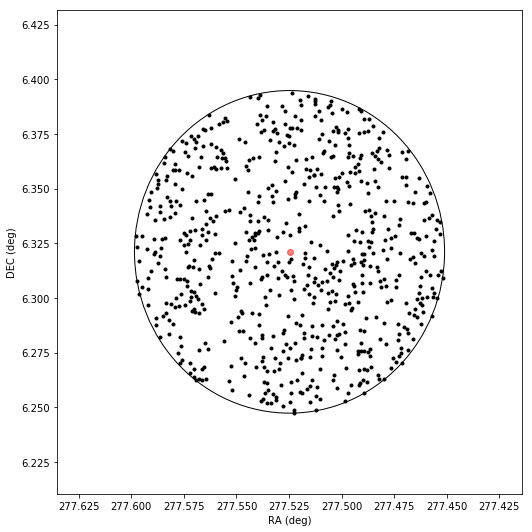

Overdensity:  1.1342592592592595
-----
MESSIER 084
NED (z, v, ra, dec):  0.003392 1017.0 186.2656 12.88698
From redshift & tangential_dist (dA, theta): 14.949233862918131 7.665380050706896
error! maybe can not identify from name
----
Error

[HB89] 1514+197
NED (z, v, ra, dec):  1.07 320778.0 229.23665 19.53694
From redshift & tangential_dist (dA, theta): 1722.9801220862478 0.06650776614149963


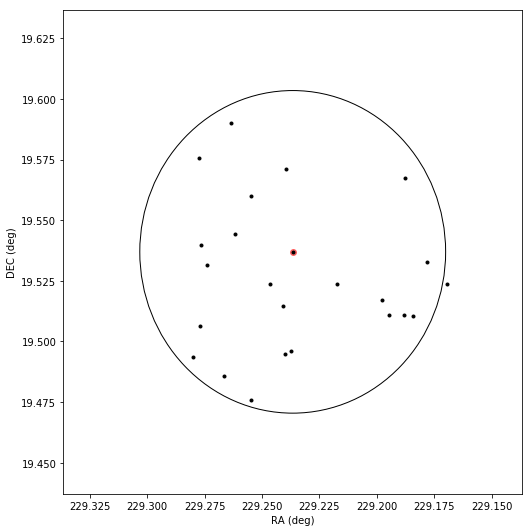

Overdensity:  1.3636363636363635
-----
LQAC 069+030 001
NED (z, v, ra, dec):  1.454 435898.0 69.52062 30.07931
From redshift & tangential_dist (dA, theta): 1789.4637633558145 0.06403681447634847


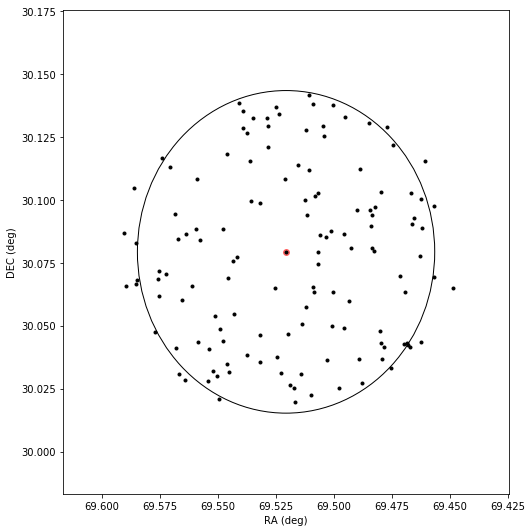

Overdensity:  0.5813953488372093
-----
[HB89] 2131-021
NED (z, v, ra, dec):  1.285 385233.0 323.54296 -1.88812
From redshift & tangential_dist (dA, theta): 1772.3854802599205 0.06465385792336766


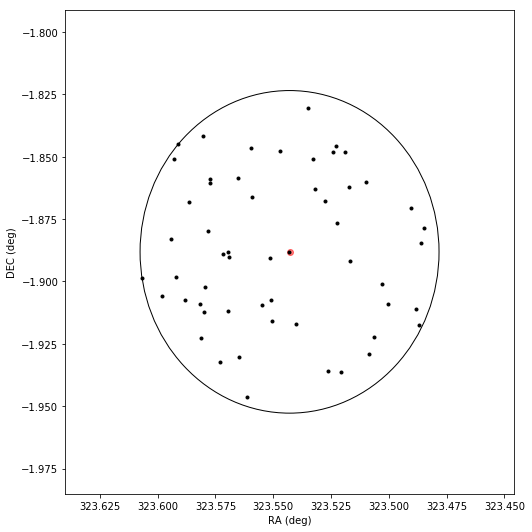

Overdensity:  0.5660377358490567
-----
4C +00.81
NED (z, v, ra, dec):  2.249877 674496.0 336.6939 0.86981
From redshift & tangential_dist (dA, theta): 1741.4070377375724 0.06580400592330295


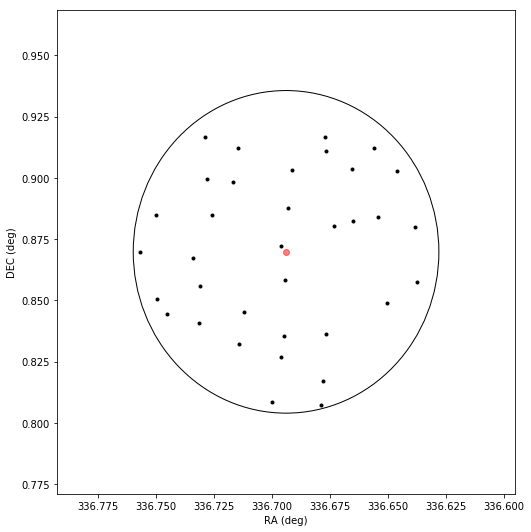

Overdensity:  0.909090909090909
-----
LQAC 066+023 001
NED (z, v, ra, dec):  0.55 164886.0 66.73223 23.46101
From redshift & tangential_dist (dA, theta): 1361.9988946301735 0.08413483996055661


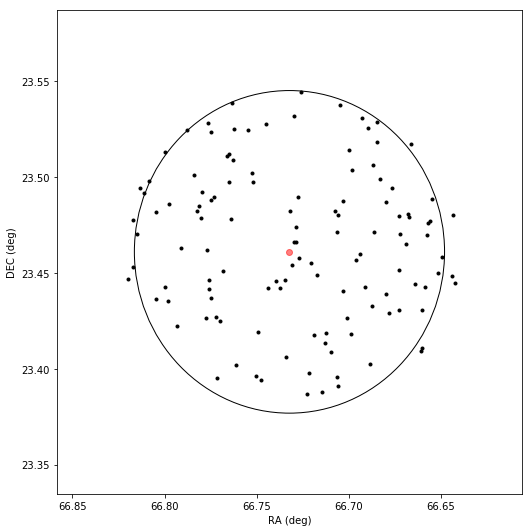

Overdensity:  1.3392857142857144
-----
PKS 1622-29
NED (z, v, ra, dec):  0.815 244331.0 246.52509 -29.85749
From redshift & tangential_dist (dA, theta): 1602.9924999664522 0.07148602319010404


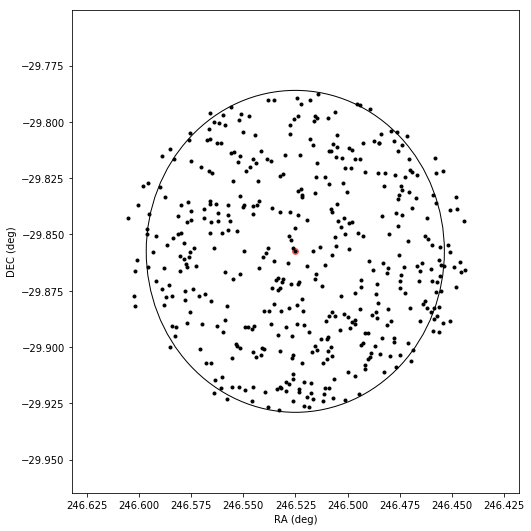

Overdensity:  1.1177884615384617
-----
PKS 1057-79
NED (z, v, ra, dec):  0.581 174179.0 164.68046 -80.06504
From redshift & tangential_dist (dA, theta): 1398.6384248097584 0.08193079568920845


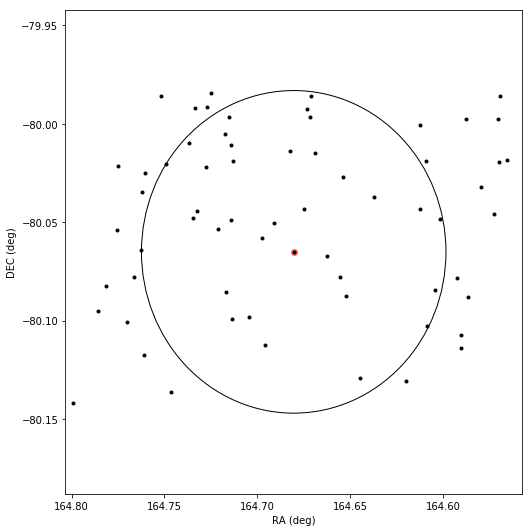

Overdensity:  0.9045226130653267
-----


In [11]:
objlist = ['WISE J161021.87-395858.4', 
           '[HB89] 1741-038', 
           '3C 454.3', 
           'PKS 0539-057', 
           'PKS 0601-70', 
           'SSTSL2 J113006.83-144912.6',
           'NGC 4945', 
           '[HB89] 0333+321 ABS01', 
           'PKS 0003-066', 
           'PKS 1830-21', 
           '[HB89] 0234+285', 
           '[HB89] 0748+126',
           '[HB89] 1749+096', 
           'WISE J094857.31+002225.6', 
           '[HB89] 1104-445', 
           '3C 279', 
           'WISE J183005.92+061915.7', 
           'MESSIER 084', 
           '[HB89] 1514+197', 
           'LQAC 069+030 001', 
           '[HB89] 2131-021', 
           '4C +00.81', 
           'LQAC 066+023 001',
           'PKS 1622-29', 
           'PKS 1057-79']

res = []
for objname in objlist:
    try:
        data, z, ra_center, dec_center = search_and_plot(objname, 2.0, 'fp_psc')
        if len(data) >= Irsa.ROW_LIMIT: print("Probably number of rows limit < number of data")
        inside, outside, thetamin, thetamax, result_par = check_overdensity(data, ra_center, dec_center, z, 0.5, 2.0)
        print("Overdensity: ", result_par[-1])
        res.append([objname, data, z, ra_center, dec_center, inside, outside, thetamin, thetamax, result_par])
        print("-----")
    
    except:
        print("Error\n")

In [12]:
number_of_overdensity = 0
number_of_lowdensity = 0 
for ires in res:
    od = ires[-1][-1]
    print(od)
    if od > 1.0:
        number_of_overdensity += 1
    else:
        number_of_lowdensity +=1
print("Low:", number_of_lowdensity, "    High:", number_of_overdensity)

1.2591240875912408
1.079136690647482
2.6923076923076925
1.1842105263157896
0.9375
1.9354838709677422
1.4062500000000002
0.28301886792452835
1.0396039603960394
0.7317073170731707
1.6901408450704223
0.920245398773006
1.111111111111111
1.1065573770491806
2.083333333333333
1.1342592592592595
1.3636363636363635
0.5813953488372093
0.5660377358490567
0.909090909090909
1.3392857142857144
1.1177884615384617
0.9045226130653267
Low: 8     High: 15


In [13]:
0.07030455605796143*3600

253.09640180866114